# MMA 831 DOS1
This assignment requires R but is good Python practice.

## Some more visualizations using Python + Seaborn

In [1]:
import numpy as np

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.set_cmap('Set2')

import seaborn as sns
colours = sns.color_palette('Set2')

In [34]:
plt.rcParams["figure.figsize"] = (15,15)

## Load Data

In [2]:
dat = pd.read_csv('adv_sales.csv')

## Summary statistics etc.

In [3]:
dat.shape

(1000, 8)

In [4]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
Unnamed: 0    1000 non-null int64
store         1000 non-null int64
billboard     1000 non-null int64
printout      1000 non-null int64
sat           1000 non-null int64
comp          1000 non-null int64
price         1000 non-null int64
sales         1000 non-null float64
dtypes: float64(1), int64(7)
memory usage: 62.6 KB


Looks like there's an Store ID column, let's delete that, not important.

In [5]:
dat_noids = dat.drop('Unnamed: 0', axis = 1)

In [6]:
dat_noids.describe()

,store,billboard,printout,sat,comp,price,sales
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,1992.846000,1003.125000,806.736000,69.44600,791.696000,99.745000,17585.570057
std,249.323012,245.298999,253.075324,4.97492,194.407685,4.859382,3675.822394
min,1150.000000,219.000000,26.000000,54.00000,230.000000,85.000000,5819.258467
25%,1831.000000,845.000000,626.000000,66.00000,656.000000,96.000000,15061.530202
50%,1990.000000,1003.000000,814.000000,70.00000,788.000000,100.000000,17385.358867
75%,2153.250000,1167.500000,979.250000,73.00000,931.000000,103.000000,20038.304889
max,2798.000000,1791.000000,1555.000000,85.00000,1339.000000,117.000000,33766.691513


Looks like no outliers from here.

In [7]:
dat_noids.head()

,store,billboard,printout,sat,comp,price,sales
0,1698,698,556,68,607,95,13605.611909
1,2069,1075,775,72,637,101,19142.673338
2,2271,615,772,71,761,95,15027.623400
3,1413,1158,1098,79,1183,98,16589.659102
4,2107,1175,386,77,940,97,21887.582100


## Check for missing values

In [8]:
dat_noids.isnull().sum()

store        0
billboard    0
printout     0
sat          0
comp         0
price        0
sales        0
dtype: int64

No missing values.

## Visualizations

Here comes the fancy stuff!

### Histograms

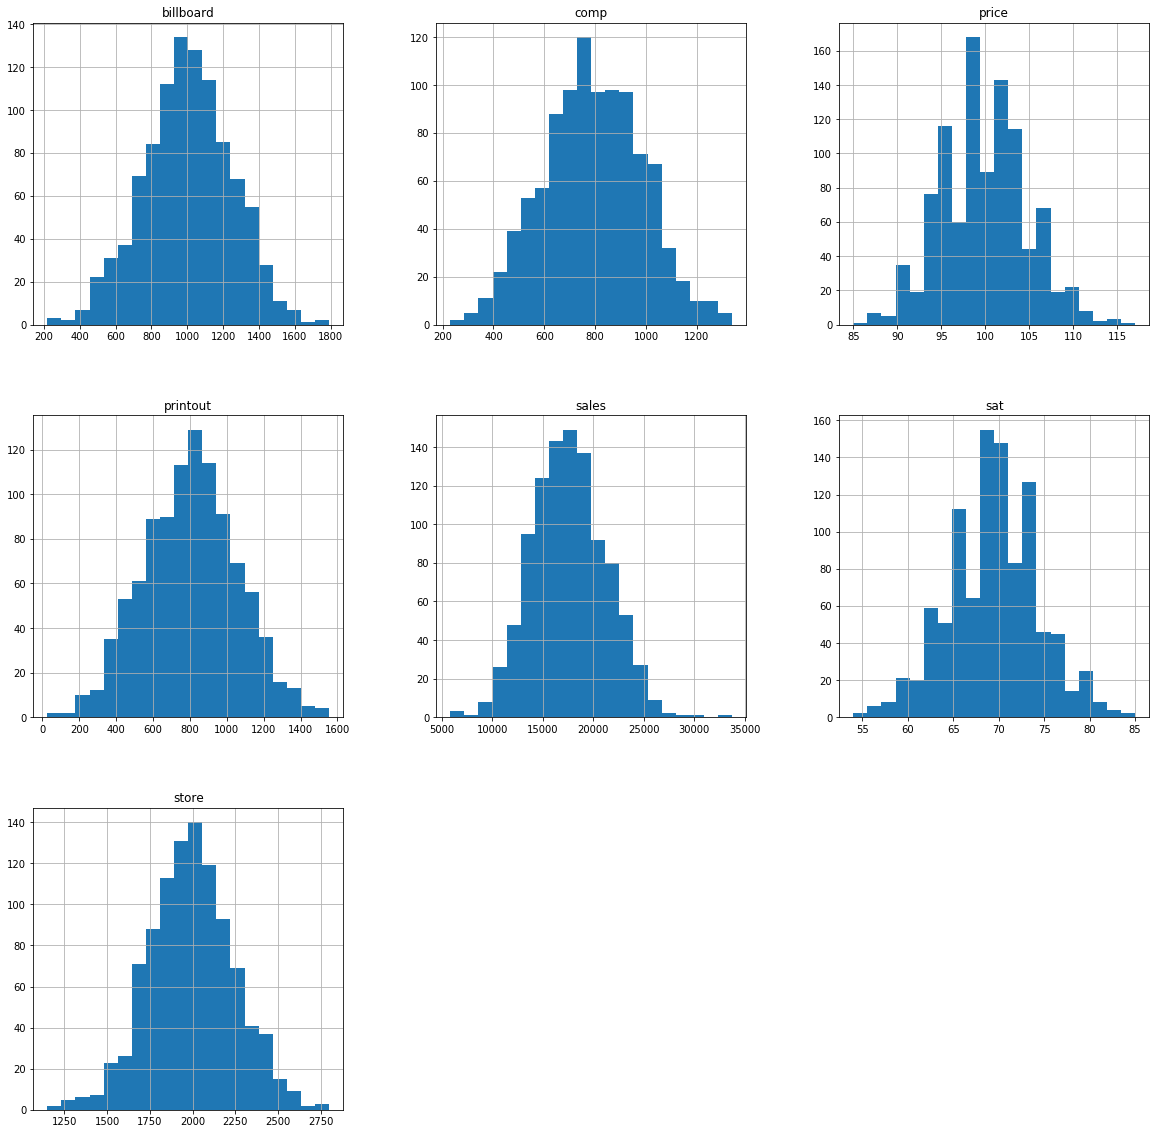

In [9]:
dat_noids.hist(bins = 20, figsize = (20,20))
plt.show()

Looks to be mostly normal, except for price and satisfaction.

### Pair plots

Use `diag_kind = 'kde'` to show kernel density estimates in the diagonals.
`kind = reg` shows regression lines for each scatterplot. This increases run time by A LOT. Can also use a correlation matrix (next plot) to visualize pairwise linear relationships.

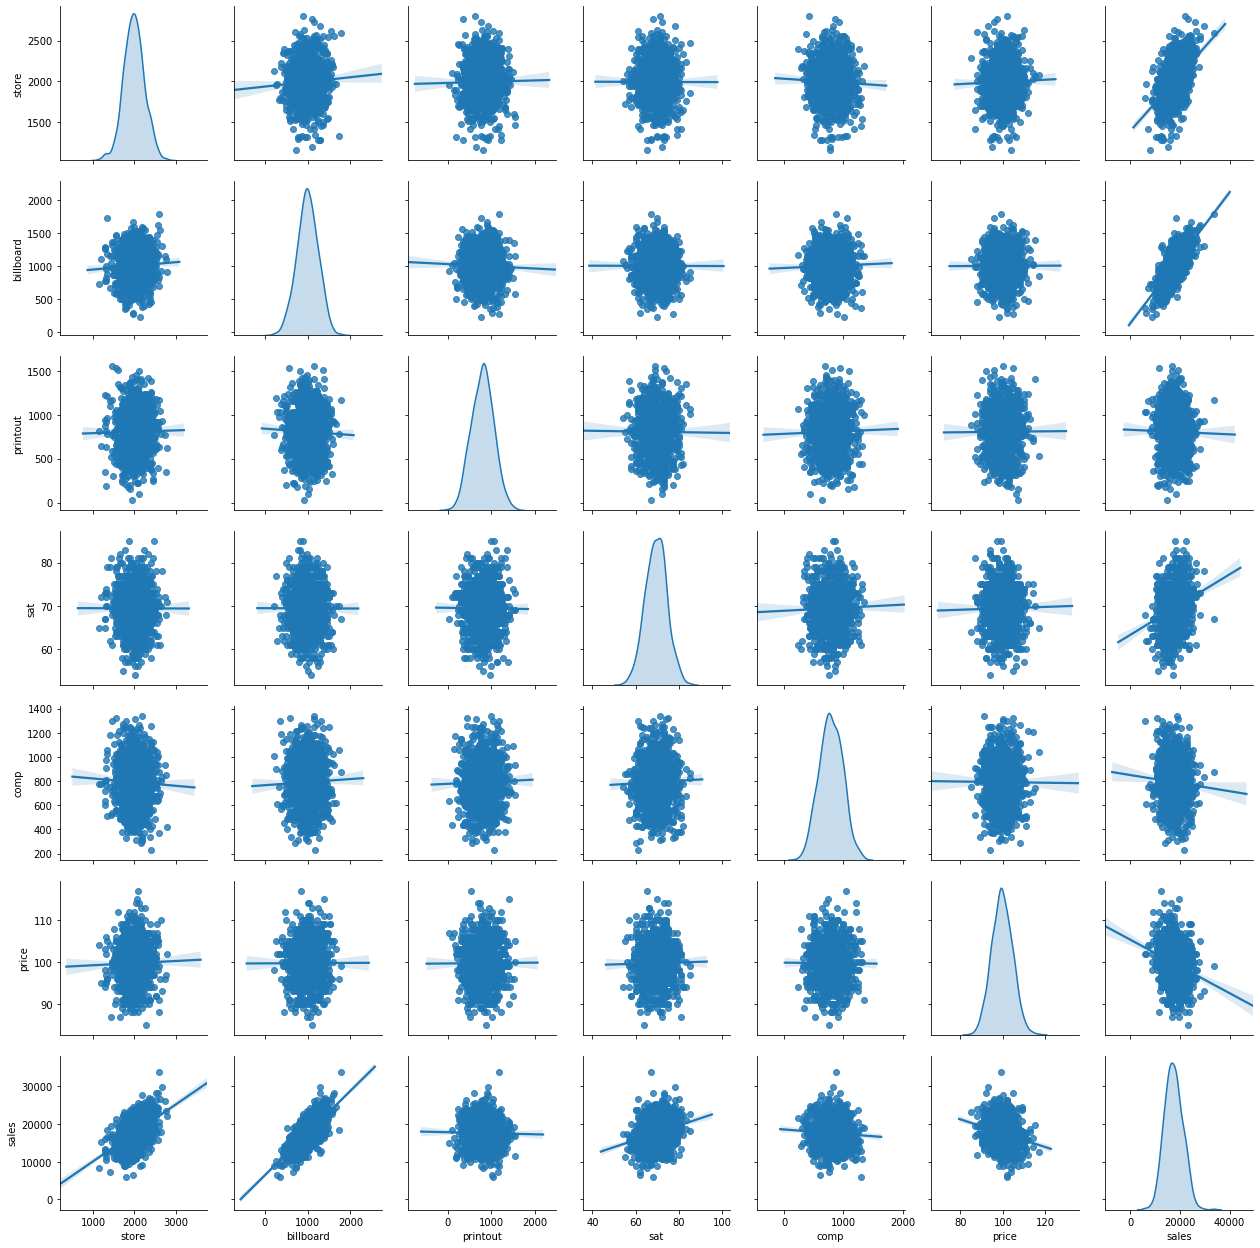

In [10]:
sns.pairplot(dat_noids, palette = colours, kind = 'reg', diag_kind = 'kde')
plt.show()

### Correlation matrix

If wanted can draw a white mask to only show half of the plot (because each half is the same), but I'm too lazy...

First we define a diverging colour palette:

In [11]:
diverging_palette = sns.diverging_palette(220, 10, as_cmap = True)

Plot it:

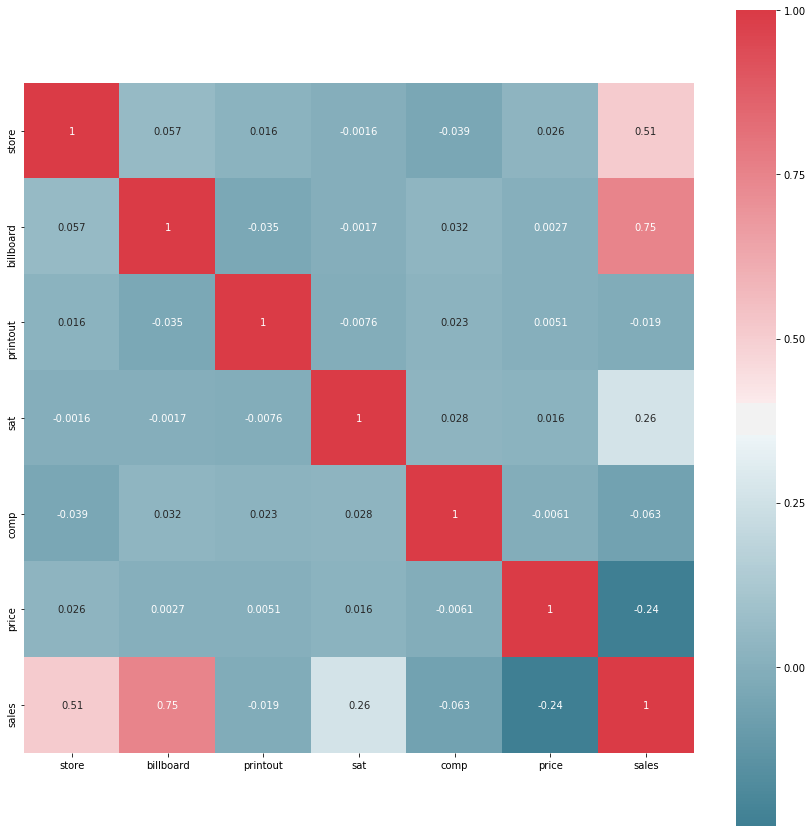

In [35]:
sns.heatmap(dat_noids.corr(), cmap = diverging_palette, square = True, annot = True)
plt.show()

### Plot scatterplots for advertising channels

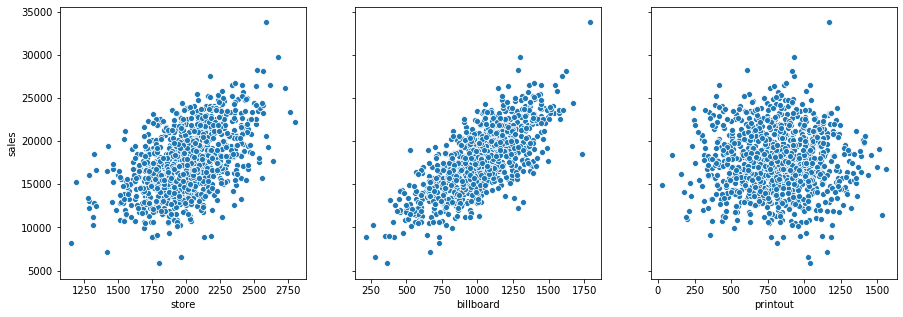

In [91]:
fig, ax = plt.subplots(1, 3, figsize = (15,5), sharey = True)
sns.scatterplot(x = 'store', y = 'sales', data = dat_noids, ax = ax[0])
sns.scatterplot(x = 'billboard', y = 'sales', data = dat_noids, ax = ax[1])
sns.scatterplot(x = 'printout', y = 'sales', data = dat_noids, ax = ax[2])
fig.show()

Alternatively put it all on the same graph.
(This took me an hour to figure out. Thanks Google and StackOverflow!)

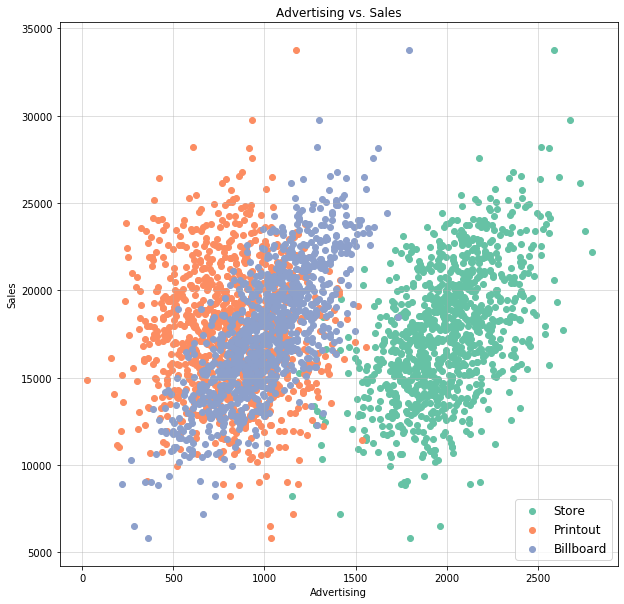

In [83]:
fig, ax = plt.subplots(figsize = (10,10))
ax.grid(True, alpha = 0.5)
ax.scatter(x = 'store', y = 'sales', data = dat_noids, color = '#66c2a5')
ax.scatter(x = 'printout', y = 'sales', data = dat_noids, color = '#fc8d62')
ax.scatter(x = 'billboard', y = 'sales', data = dat_noids, color = '#8da0cb')
ax.set_title('Advertising vs. Sales')
ax.set_ylabel('Sales')
ax.set_xlabel('Advertising')
ax.legend(['Store', 'Printout', 'Billboard'], loc = 4, fontsize = 'large')
fig.show()

Alternatively, do a pairplot with only the three interesting features:

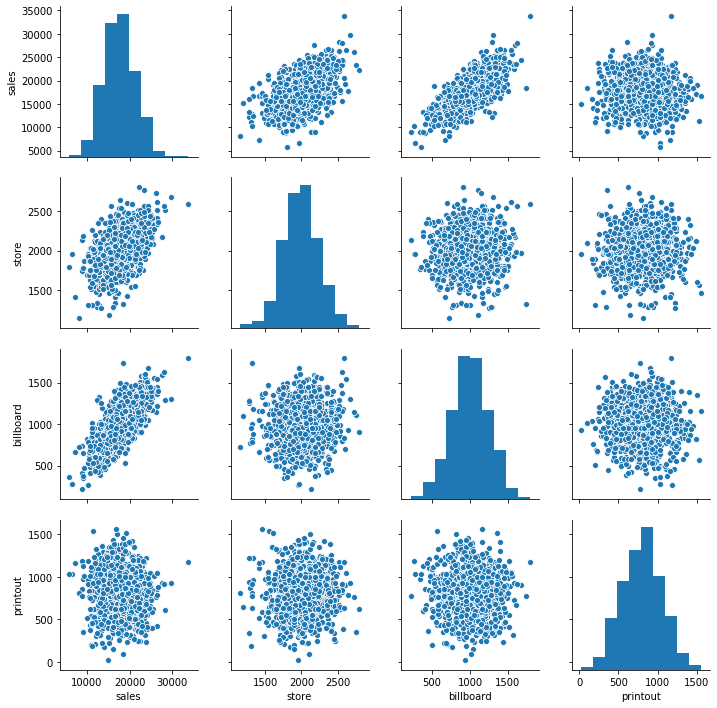

In [23]:
sns.pairplot(dat_noids[['sales', 'store', 'billboard', 'printout']], palette = colours)
plt.show()

## Split Train and Test

## Linear Regression